**Esther Notebook - Phase 1 EDA**

In [0]:
from pyspark.sql.functions import col

import matplotlib.pyplot as plt
from pyspark.sql import functions as f
from pyspark.sql.functions import isnull, when, count
from pyspark.sql.functions import *
from pyspark.sql import SQLContext
from pyspark.sql.types import *
import pyspark
import pandas as pd
import numpy as np


##Azure Blob Storage

In [0]:
from pyspark.sql.functions import col, max

blob_container = "main-storage" # The name of your container created in https://portal.azure.com
storage_account = "team05w261" # The name of your Storage account created in https://portal.azure.com
secret_scope = "team05" # The name of the scope created in your local computer using the Databricks CLI
secret_key = "team05-key" # The name of the secret key created in your local computer using the Databricks CLI 
blob_url = f"wasbs://{blob_container}@{storage_account}.blob.core.windows.net"
mount_path = "/mnt/mids-w261"

# Access Key
spark.conf.set(
  f"fs.azure.account.key.{storage_account}.blob.core.windows.net",
  dbutils.secrets.get(scope = secret_scope, key = secret_key)
)

In [0]:
# Inspect the Mount's Final Project folder 
display(dbutils.fs.ls("/mnt/mids-w261/datasets_final_project"))

path name size dbfs:/mnt/mids-w261/datasets_final_project/airlines/ airlines/ 0 dbfs:/mnt/mids-w261/datasets_final_project/airlines_data/ airlines_data/ 0 dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data/ parquet_airlines_data/ 0 dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data_3m/ parquet_airlines_data_3m/ 0 dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data_6m/ parquet_airlines_data_6m/ 0 dbfs:/mnt/mids-w261/datasets_final_project/stations_data/ stations_data/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data/ weather_data/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data_6_hr/ weather_data_6_hr/ 0 dbfs:/mnt/mids-w261/datasets_final_project/weather_data_single/ weather_data_single/ 0

# Import Datasets

##Flight Data 2015 Q1 (3 months)

In [0]:
# Load 2015 Q1 for Flights
df_airlines = spark.read.parquet("/mnt/mids-w261/datasets_final_project/parquet_airlines_data_3m/")
display(df_airlines)

YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM 2015 1 2 1 7 2015-02-01 AA 19805 AA N3MEAA 392 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 12953 1295302 31703 LGA New York, NY NY 36 New York 22 730 749 19.0 19.0 1.0 1 0700-0759 34.0 823 1056 4.0 1030 1100 30.0 30.0 1.0 2 1000-1059 0.0 null 0.0 120.0 131.0 93.0 1.0 733.0 3 0.0 19.0 11.0 0.0 0.0 null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2015 1 2 2 1 2015-02-02 AA 19805 AA N3LPAA 392 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 12953 1295302 31703 LGA New York, NY NY 36 New York 22 730 null null null null null 0700-0759 null null null null 1030 null null null null null 1000-1059 1.0 B 0.0 120.0 null null 1.0 733.0 3 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2015 1 2 3 2 2015-02-03 AA 19805 AA N3LXAA 392 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 12953 1295302 31703 LGA New York, NY NY 36 New York 22 730 735 5.0 5.0 0.0 0 0700-0759 19.0 754 1027 9.0 1030 1036 6.0 6.0 0.0 0 1000-1059 0.0 null 0.0 120.0 121.0 93.0 1.0 733.0 3 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2015 1 2 4 3 2015-02-04 AA 19805 AA N3LHAA 392 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 12953 1295302 31703 LGA New York, NY NY 36 New York 22 730 727 -3.0 0.0 0.0 -1 0700-0759 11.0 738 1008 5.0 1030 1013 -17.0 0.0 0.0 -2 1000-1059 0.0 null 0.0 120.0 106.0 90.0 1.0 733.0 3 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2015 1 2 5 4 2015-02-05 AA 19805 AA N3LYAA 392 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 12953 1295302 31703 LGA New York, NY NY 36 New York 22 730 757 27.0 27.0 1.0 1 0700-0759 23.0 820 1058 3.0 1030 11

In [0]:
df_airlines.

## Weather Data 2015 Q1 (3 months)

In [0]:
# Load the 2015 Q1 for Weather
df_weather = spark.read.parquet("/mnt/mids-w261/datasets_final_project/weather_data/*").filter(col('DATE') < "2015-04-01T00:00:00.000")
display(df_weather)

STATION DATE SOURCE LATITUDE LONGITUDE ELEVATION NAME REPORT_TYPE CALL_SIGN QUALITY_CONTROL WND CIG VIS TMP DEW SLP AW1 GA1 GA2 GA3 GA4 GE1 GF1 KA1 KA2 MA1 MD1 MW1 MW2 OC1 OD1 OD2 REM EQD AW2 AX4 GD1 AW5 GN1 AJ1 AW3 MK1 KA4 GG3 AN1 RH1 AU5 HL1 OB1 AT8 AW7 AZ1 CH1 RH3 GK1 IB1 AX1 CT1 AK1 CN2 OE1 MW5 AO1 KA3 AA3 CR1 CF2 KB2 GM1 AT5 AY2 MW6 MG1 AH6 AU2 GD2 AW4 MF1 AA1 AH2 AH3 OE3 AT6 AL2 AL3 AX5 IB2 AI3 CV3 WA1 GH1 KF1 CU2 CT3 SA1 AU1 KD2 AI5 GO1 GD3 CG3 AI1 AL1 AW6 MW4 AX6 CV1 ME1 KC2 CN1 UA1 GD5 UG2 AT3 AT4 GJ1 MV1 GA5 CT2 CG2 ED1 AE1 CO1 KE1 KB1 AI4 MW3 KG2 AA2 AX2 AY1 RH2 OE2 CU3 MH1 AM1 AU4 GA6 KG1 AU3 AT7 KD1 GL1 IA1 GG2 OD3 UG1 CB1 AI6 CI1 CV2 AZ2 AD1 AH1 WD1 AA4 KC1 IA2 CF3 AI2 AT1 GD4 AX3 AH4 KB3 CU1 CN4 AT2 CG1 CF1 GG1 MV2 CW1 GG4 AB1 AH5 CN3 3809099999 2015-01-01T00:00:00.000+0000 4 50.086092 -5.255711 81.38 CULDROSE, UK FM-12 99999 V020 200,1,N,0077,1 00240,1,C,N 008000,1,9,9 +0113,1 +0099,1 10306,1 01,1,+00180,1,07,1 05,1,+00240,1,07,1 08,1,+00360,1,07,1 9,AGL ,+99999,+99999 08,99,1,01,1,99,9,00180,1,99,9,99,9 99999,9,10213,1 3,1,002,1,+999,9 51,1 3,99,0144,1,999 4,99,0134,1,999 SYN10603809 11358 82015 10113 20099 30213 40306 53002 69901 75165 887// 333 81706 85708 88712 90710 91128 91026= 5,1,02,1 06,0000,2,1 6,1,02,1 3809099999 2015-01-01T00:50:00.000+0000 4 50.086092 -5.255711 81.38 CULDROSE, UK FM-15 99999 V020 210,1,N,0077,1 00183,1,C,N 008000,1,9,9 +0110,1 +0100,1 99999,9 02,1,+00122,1,99,9 04,1,+00183,1,99,9 08,1,+00305,1,99,9 9,AGL ,+99999,+99999 99,99,9,02,1,99,9,00122,1,99,9,99,9 10290,1,99999,9 51,1 MET079METAR EGDR 010050Z 21015KT 8000 -DZ FEW004 SCT006 OVC010 11/10 Q1029 YLO1= 3809099999 2015-01-01T01:00:00.000+0000 4 50.086092 -5.255711 81.38 CULDROSE, UK FM-12 99999 V020 210,1,N,0077,1 00300,1,9,N 008000,1,9,9 +0113,1 +0101,1 10300,1 01,1,+00120,1,07,1 03,1,+00180,1,07,1 08,1,+00300,1,07,1 9,AGL ,+99999,+99999 08,99,1,01,1,99,9,00120,1,99,9,99,9 99999,9,10206,1 8,1,004,1,+999,9 51,1 3,99,0134,1,999 SYN09403809 41258 82115 10113 20101 30206 40300 58004 75155 887// 333 81704 83706 88710 90710 91126= 5,1,02,1 5,1,02,1 3809099999 2015-01-01T01:50:00.000+0000 4 50.086092 -5.255711 81.38 CULDROSE, UK FM-15 99999 V020 200,1,N,0082,1 00244,1,9,N 008000,1,9,9 +0120,1 +0100,1 99999,9 04,1,+00183,1,99,9 07,1,+00244,1,99,9 08,1,+00305,1,99,9 9,AGL ,+99999,+99999 99,99,9,04,1,99,9,00183,1,99,9,99,9 10290,1,99999,9 05,1 0144,1 MET086METAR EGDR 010150Z 20016G28KT 8000 HZ SCT006 BKN008 OVC010 12/10 Q1029 REDZ YLO1= 3809099999 2015-01-01T02:00:00.000+0000 4 50.086092 -5.255711 81.38 CULDROSE, UK FM-12 99999 V020 200,1,N,0082,1 00240,1,C,N 008000,1,9,9 +0115,1 +0100,1 10294,1 03,1,+00180,1,07,1 05,1,+00240,1,07,1 08,1,+00300,1,07,1 9,AGL ,+99999,+99999 08,99,1,03,1,99,9,00180,1,99,9,99,9 99999,9,10201,1 8,1,008,1,+999,9 20,1 3,99,0149,1,999 4,99,0144,1,999 SYN10003809 41358 82016 10115 20100 30201 40294 58008 72052 886// 333 83706 85708 88710 90710 91129 91028= 2,1,02,1 5,1,02,1 3809099999 2015-01-01T02:50:00.000+0000 4 50.086092 -5.255711 81.38 CULDROSE, UK FM-15 99999 V020 210,1,N,0093,1 00122,1,9,N 006000,1,9,9 +0110,1 +0110,1 99999,9 02,1,+00061,1,99,9 07,1,+00122,1,99,9 08,1,+00213,1,99,9 9,AGL ,+99999,+99999 99,99,9,02,1,99,9,00061,1,99,9,99,9 10290,1,99999,9 51,1 MET079METAR EGDR 010250Z 21018KT 6000 -DZ FEW002 BKN004 OVC007 11/11 Q1029 YLO2= 3809099999 2015-01-01T03:00:00.000+0000 4 50.086092 -5.255711 81.38 CULDROSE, UK FM-12 99999 V020 210,1,N,0093,1 00120,1,C,N 006000,1,9,9 +0111,1 +0106,1 10296,1 01,1,+00060,1,07,1 05,1,+00120,1,07,1 08,1,+00210,1,07,1 9,AGL ,+99999,+99999 08,99,1,01,1,99,9,00060,1,99,9,99,9 99999,9,10203,1 5,1,010,1,+999,9 50,1 3,99,0144,1,999 SYN09403809 41156 82118 10111 20106 30203 40296 55010 75052 887// 333 81702 85704 88707 90710 91128= 2,1,02,1 5,1,02,1 3809099999 2015-01-01T03:50:00.000+0000 4 50.086092 -5.255711 81.38 CULDROSE, UK FM-15 99999 V020 200,1,N,0082,1 00122,1,9,N 006000,1,9,9 +0110,1 +0110,1 99999,9 02,1,+00061,1,99,9 07,1,+00122,1,99,9 08,1,+00183,1,99,9 9,AGL ,+99999,+

## Station Data

In [0]:
df_stations = spark.read.parquet("/mnt/mids-w261/datasets_final_project/stations_data/*")
display(df_stations)

usaf wban station_id lat lon neighbor_id neighbor_name neighbor_state neighbor_call neighbor_lat neighbor_lon distance_to_neighbor 690020 93218 69002093218 36.0 -121.233 69002093218 JOLON HUNTER LIGGETT MIL RES CA KHGT 36.0 -121.233 0.0 690020 93218 69002093218 36.0 -121.233 69007093217 FRITZSCHE AAF CA KOAR 36.683 -121.767 55.73024537916726 690020 93218 69002093218 36.0 -121.233 69014093101 EL TORO MCAS CA KNZJ 33.667 -117.733 255.49106220353934 690020 93218 69002093218 36.0 -121.233 70027127506 BARROW POINT BARROW AK KPBA 71.333 -156.65 2750.4353299559803 690020 93218 69002093218 36.0 -121.233 70045027512 LONELY AK LNI 70.917 -153.25 2676.3554370627153 690020 93218 69002093218 36.0 -121.233 70063027403 OLIKTOK POW 2 AK POLI 70.5 -149.883 2604.050248854232 690020 93218 69002093218 36.0 -121.233 70063526465 GALBRAITH LAKE AIRPORT AK PAGB 68.479 -149.49 2490.9756094472277 690020 93218 69002093218 36.0 -121.233 70063627405 PRUDHOE BAY AK PAUD 70.25 -148.333 2568.180281844432 690020 93218 69002093218 36.0 -121.233 70104626418 CENTRAL AIRPORT AK PACE 65.567 -144.765 2254.5584891291946 690020 93218 69002093218 36.0 -121.233 70119526625 SHISHMAREF/NEW AIRPORT AK PASH 66.25 -166.089 2743.6881828292408 690020 93218 69002093218 36.0 -121.233 70121326638 POINT LAY LIZ 2 AK PIZ 69.733 -163.017 2796.6187763021226 690020 93218 69002093218 36.0 -121.233 70148626642 KIVALINA AIRPORT AK PAVL 67.732 -164.548 2755.8847615355235 690020 93218 69002093218 36.0 -121.233 70162026508 UMIAT AK PAUM 69.367 -152.133 2580.421414177685 690020 93218 69002093218 36.0 -121.233 70171900490 SHUNGNAK AIRPORT AK PAGH 66.888 -157.162 2560.459862643483 690020 93218 69002093218 36.0 -121.233 70174526480 CHANDALAR LAKE AIRPORT AK PALR 67.511 -148.493 2423.3408124753164 690020 93218 69002093218 36.0 -121.233 70179326524 MANLEY HOT SPRINGS AK PAML 64.999 -150.638 2336.6091618691917 690020 93218 69002093218 36.0 -121.233 70199526628 CAPE DARBY REMOT COM OUTLT AK PAGL 64.55 -163.007 2610.7849480759573 690020 93218 69002093218 36.0 -121.233 70206026632 NORTHEAST CAPE AK KOHC 63.317 -168.967 2740.2899674712785 690020 93218 69002093218 36.0 -121.233 70222326602 KOYUK AIRPORT AK PAKK 64.935 -161.155 2576.6261990332778 690020 93218 69002093218 36.0 -121.233 70231226555 FAREWELL LAKE SEAPLANE BASE AK PAFK 62.543 -153.623 2293.7430034471354 690020 93218 69002093218 36.0 -121.233 70249526547 HAYES RIVER AIRPORT AK PAHZ 61.983 -152.083 2230.946084519868 690020 93218 69002093218 36.0 -121.233 70255026514 SKWENTNA AIRPORT AK PASW 61.977 -151.217 2209.0623964277706 690020 93218 69002093218 36.0 -121.233 70264026414 SUMMIT AK PAST 63.331 -149.127 2223.352307308065 690020 93218 69002093218 36.0 -121.233 70264726499 HEALY RIVER AIRPORT AK PAHV 63.866 -148.969 2246.1213363715397 690020 93218 69002093218 36.0 -121.233 70264846406 CANTWELL AIRPORT AK PATW 63.391 -148.956 2222.52653340686 690020 93218 69002093218 36.0 -121.233 70267526484 PAXSON AIRPORT AK PAXK 63.032 -145.498 2131.3748228756726 690020 93218 69002093218 36.0 -121.233 70269596402 JONESVILLE MINE AIRPORT AK PAJV 61.714 -148.909 2140.8509123873396 690020 93218 69002093218 36.0 -121.233 70271126439 SHEEP MOUNTAIN AIRPORT AK PASP 61.812 -147.507 2112.749500893187 690020 93218 69002093218 36.0 -121.233 70274526560 WILLOW AIRPORT AK PAUO 61.748 -150.054 2170.093644623675 690020 93218 69002093218 36.0 -121.233 70275026442 NATIONAL WEATHER SERVICE OFFI AK PAVW 61.13 -146.352 2052.4465612834106 690020 93218 69002093218 36.0 -121.233 70275546404 MCCARTHY AIRPORT AK PAMX 61.437 -142.904 1993.3299561949077 690020 93218 69002093218 36.0 -121.233 70275726444 WHITTIER AIRPORT AK PAWR 60.783 -148.733 2092.9535147837305 690020 93218 69002093218 36.0 -121.233 70291346402 DEVILS MOUNTAIN LODGE AIRPORT AK PABN 62.402 -142.995 2047.8132237563839 690020 93218 69002093218 36.0 -121.233 70291526486 DUFFY'S TAVERN AIRPORT AK PADT 62.709 -143.981 2083.812325469856 690020 93218 69002093218 36.0 -121.233 70292326440 TANACROSS AK TSG 63.383 -143.333 2

## OpenFlight Data (IATA & ICAO)

In [0]:
# Import Open Flight Data, which contains IATA code and ICAO code. These 2 codes can be used to join tables 

open_flight_data = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', header=None)
open_flight_schema = {
    0: 'AirportID', 1: 'Name', 2: 'City', 3: 'Country', 4: 'IATA', 5: 'ICAO', 6: 'Latitude', 
    7: 'Longitude', 8: 'Altitude', 9: 'Timezone', 10: 'DST', 11: 'TZ_Timezone', 12: 'Type', 13: 'Source'
}
open_flight_data.rename(columns=open_flight_schema, inplace=True)
airport_code = spark.createDataFrame(open_flight_data)
display(airport_code)
airport_code.createOrReplaceTempView("airport_code")

AirportID Name City Country IATA ICAO Latitude Longitude Altitude Timezone DST TZ_Timezone Type Source 1 Goroka Airport Goroka Papua New Guinea GKA AYGA -6.081689834590001 145.391998291 5282 10 U Pacific/Port_Moresby airport OurAirports 2 Madang Airport Madang Papua New Guinea MAG AYMD -5.20707988739 145.789001465 20 10 U Pacific/Port_Moresby airport OurAirports 3 Mount Hagen Kagamuga Airport Mount Hagen Papua New Guinea HGU AYMH -5.826789855957031 144.29600524902344 5388 10 U Pacific/Port_Moresby airport OurAirports 4 Nadzab Airport Nadzab Papua New Guinea LAE AYNZ -6.569803 146.725977 239 10 U Pacific/Port_Moresby airport OurAirports 5 Port Moresby Jacksons International Airport Port Moresby Papua New Guinea POM AYPY -9.44338035583496 147.22000122070312 146 10 U Pacific/Port_Moresby airport OurAirports 6 Wewak International Airport Wewak Papua New Guinea WWK AYWK -3.58383011818 143.669006348 19 10 U Pacific/Port_Moresby airport OurAirports 7 Narsarsuaq Airport Narssarssuaq Greenland UAK BGBW 61.1604995728 -45.4259986877 112 -3 E America/Godthab airport OurAirports 8 Godthaab / Nuuk Airport Godthaab Greenland GOH BGGH 64.19090271 -51.6781005859 283 -3 E America/Godthab airport OurAirports 9 Kangerlussuaq Airport Sondrestrom Greenland SFJ BGSF 67.0122218992 -50.7116031647 165 -3 E America/Godthab airport OurAirports 10 Thule Air Base Thule Greenland THU BGTL 76.5311965942 -68.7032012939 251 -4 E America/Thule airport OurAirports 11 Akureyri Airport Akureyri Iceland AEY BIAR 65.66000366210938 -18.07270050048828 6 0 N Atlantic/Reykjavik airport OurAirports 12 Egilsstaðir Airport Egilsstadir Iceland EGS BIEG 65.2833023071289 -14.401399612426758 76 0 N Atlantic/Reykjavik airport OurAirports 13 Hornafjörður Airport Hofn Iceland HFN BIHN 64.295601 -15.2272 24 0 N Atlantic/Reykjavik airport OurAirports 14 Húsavík Airport Husavik Iceland HZK BIHU 65.952301 -17.426001 48 0 N Atlantic/Reykjavik airport OurAirports 15 Ísafjörður Airport Isafjordur Iceland IFJ BIIS 66.05809783935547 -23.135299682617188 8 0 N Atlantic/Reykjavik airport OurAirports 16 Keflavik International Airport Keflavik Iceland KEF BIKF 63.985000610352 -22.605600357056 171 0 N Atlantic/Reykjavik airport OurAirports 17 Patreksfjörður Airport Patreksfjordur Iceland PFJ BIPA 65.555801 -23.965 11 0 N Atlantic/Reykjavik airport OurAirports 18 Reykjavik Airport Reykjavik Iceland RKV BIRK 64.1299972534 -21.9405994415 48 0 N Atlantic/Reykjavik airport OurAirports 19 Siglufjörður Airport Siglufjordur Iceland SIJ BISI 66.133301 -18.9167 10 0 N Atlantic/Reykjavik airport OurAirports 20 Vestmannaeyjar Airport Vestmannaeyjar Iceland VEY BIVM 63.42430114746094 -20.27890014648437 326 0 N Atlantic/Reykjavik airport OurAirports 21 Sault Ste Marie Airport Sault Sainte Marie Canada YAM CYAM 46.48500061035156 -84.5093994140625 630 -5 A America/Toronto airport OurAirports 22 Winnipeg / St. Andrews Airport Winnipeg Canada \N CYAV 50.0564002991 -97.0325012207 760 -6 A America/Winnipeg airport OurAirports 23 Halifax / CFB Shearwater Heliport Halifax Canada \N CYAW 44.639702 -63.499401 144 -4 A America/Halifax airport OurAirports 24 St. Anthony Airport St. Anthony Canada YAY CYAY 51.3918991089 -56.083099365200006 108 -3.5 A America/St_Johns airport OurAirports 25 Tofino / Long Beach Airport Tofino Canada YAZ CYAZ 49.079833 -125.775583 80 -8 A America/Vancouver airport OurAirports 26 Kugaaruk Airport Pelly Bay Canada YBB CYBB 68.534401 -89.808098 56 -7 A America/Edmonton airport OurAirports 27 Baie Comeau Airport Baie Comeau Canada YBC CYBC 49.13249969482422 -68.20439910888672 71 -5 A America/Toronto airport OurAirports 28 CFB Bagotville Bagotville Canada YBG CYBG 48.33060073852539 -70.99639892578125 522 -5 A America/Toronto airport OurAirports 29 Baker Lake Airport Baker Lake Canada YBK CYBK 64.29889678960001 -96.077796936 59 -6 A America/Winnipeg airport OurAirports 30 Campbell River Airport Campbell River Canada YBL CYBL 49.950801849365234 -125.27100372314452 346 -8 A America/Vancouver airpor

# Exploratory Data Analysis (EDA)

##Flight Dataset EDA

In [0]:
print("Total Number of features in flight dataset:", len(df_airlines.columns))

Total Number of features in flight dataset: 109

There are 109 features in total in flight dataset.

##### Number of Carriers

In [0]:
display(df_airlines.select("OP_UNIQUE_CARRIER").distinct())

OP_UNIQUE_CARRIER UA NK AA EV B6 DL OO F9 US MQ AS VX WN

NOTES: 2015 Q1: total Number of Unique Airline Carriers: 13

##### Diverted flights?

In [0]:
# Diverted Flight Indicator (1=Yes)
diverted_flights = df_airlines.where(col("DIVERTED") == 1)
display(diverted_flights)

YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM 2015 1 2 22 7 2015-02-22 AA 19805 AA N012AA 1080 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 11503 1150303 31503 EGE Eagle, CO CO 8 Colorado 82 1145 1347 122.0 122.0 1.0 8 1100-1159 15.0 1402 1930 4.0 1335 1934 null null null null 1300-1359 0.0 null 1.0 170.0 null null 1.0 1007.0 5 null null null null null 1139 37.0 37.0 1 1.0 1847.0 1799.0 0.0 DEN 11292 1129202 1644 44.0 35.0 1906 N012AA null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2015 1 2 25 3 2015-02-25 AA 19805 AA N009AA 1080 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 11503 1150303 31503 EGE Eagle, CO CO 8 Colorado 82 1145 1143 -2.0 0.0 0.0 -1 1100-1159 14.0 1157 1628 4.0 1335 1632 null null null null 1300-1359 0.0 null 1.0 170.0 null null 1.0 1007.0 5 null null null null null null null null 1 1.0 349.0 177.0 0.0 SLC 14869 1486903 1441 57.0 57.0 1538 N009AA null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2015 1 2 21 6 2015-02-21 AA 19805 AA N3GRAA 354 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 12953 1295302 31703 LGA New York, NY NY 36 New York 22 1635 1647 12.0 12.0 0.0 0 1600-1659 18.0 1705 null null 1938 null null null null null 1900-1959 0.0 null 1.0 123.0 null null 1.0 733.0 3 null null null null null null null null 1 0.0 null null 11.0 JFK 12478 1247802 2003 26.0 26.0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2015 1 2 3 2 2015-02-03 B6 20409 B6 N593JB 1563 13930 1393003 30977 ORD Chicago, IL IL 17 Illinois 41 14843 1484304 34819 SJU San Juan, PR PR 72 Puerto Rico 3 1109 1202 53.0 53.0 1.0 3 1100-1159 20.0 1222 2034 5.0 1744 2039 null null null null 1700-1759 0.0 null 1.0 275.0 null null 1.0 2072.0 9 null null null null null null null null 1 1.0 397.0 175.0 0.0 NAS 13605 1360503 1628 13.0 9.0 1750 N593JB null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2015 1 2 1 7 2015-02-01 DL 19790 DL N937DN 104 10397 1039705 30397 ATL Atlanta, GA GA 13 Georgia 34 10721 1072102 30721 BOS Boston, MA MA 25 Massachusetts 13 725 727 2.

In [0]:
print("Number of diverted flights:", diverted_flights.distinct().count())
print("Number of flights in total:", df_airlines.distinct().count())
print(f'The percentage of diverted flights: {diverted_flights.distinct().count() / df_airlines.distinct().count()}')

Number of diverted flights: 381
Number of flights in total: 161057
The percentage of diverted flights: 0.0023656221089427966

NOTES & QUESTION: A flight diversion is when an aircraft is unable to arrive at its final destination.
...
Some factors that may cause a diversion are:

Aircraft emergency;

Passenger emergency;

Mechanical failure; and.

Poor weather conditions.

Diverted Flight:  A flight that is required to land at a destination other than the original scheduled destination for reasons beyond the control of the pilot/company.

How to deal with diverted flights?

##### Number of Airports(Origin)

In [0]:
display(df_airlines.select("ORIGIN").distinct())
print("Total Number of Unique ORIGIN Airports:", df_airlines.select("ORIGIN").distinct().count())

ORIGIN ATL ORD

Total Number of Unique ORIGIN Airports: 2

NOTES: 2015 Q1: Total Number of Unique Origin Airports: 2

##### Number of Airports(DEST)

In [0]:
display(df_airlines.select("DEST").distinct())
print("Total Number of Unique DEST Airports:", df_airlines.select("DEST").distinct().count())

DEST MSY SNA GRB GRR GSO MYR PVD OAK MSN FAR FSM MQT DCA CID GTR MLU LEX ORF SCE EVV CRW CWA SAV TRI CMH CAK CHO MOB PNS IAH HNL SHV ERI SJC CVG TOL LGA TLH BUF HPN AUS MLI SJU ATW DHN AVL SRQ RNO EYW SBN TTN JAC RST CHS RSW TUL BOS MLB EWR LAS BIS JAN XNA DLH DEN EWN ALB LNK PSP IAD BOI BMI SEA CMI LAN VLD MCI GRK CLT BNA TVC PBI ABQ SDF BDL DAL DBQ CLE PDX MIA TPA BWI CMX OKC ROA SMF SPI MBS ELM PHX FCA STL PWM ABY DFW MHT ABE GSP LSE FAY STX HDN GUC EGE FSD BQK CSG SFO MEM ELP BHM FLL ATL FNT RIC DAY PHF OMA STC VPS MHK LIT ICT CAE ECP ORD AVP MKG BTV COU AEX ILM PIA RDU MKE SYR LFT HSV PIT TUS MTJ MDW AZO COS OAJ IND ALO EAU GPT MGM DTW HOU CHA TYS MDT FWA ONT JAX LAX MSP BTR MCO ROC AGS SGF SAN BZN JFK DAB SUX PAH ANC GNV MSO PHL OGG DSM SLC SAT STT ASE RAP

Total Number of Unique DEST Airports: 192

NOTES: 2015 Q1: Total Number of Unique DEST Airports: 192

#####Delay flight & On-time flight & cancelled flights

In [0]:
total_flight = df_airlines.count()
delayed_flight = df_airlines.filter(df_airlines.DEP_DEL15 == 1).cache()
on_time_flight = df_airlines.filter(df_airlines.DEP_DEL15 == 0).cache()
cancelled_flight = df_airlines.filter(df_airlines.CANCELLED == 1).cache()
delayed_null_flight = df_airlines.filter(df_airlines.DEP_DEL15.isNull()).cache()

print(f'Total Flight: {total_flight}')
print(f'Total Flight delayed by 15 minutes or more: {delayed_flight.count()}')
print(f'The percentage of delayed flight: {delayed_flight.count() / total_flight }')
print(f'The percentage of on-time flight: {on_time_flight.count() / total_flight * 100}%')
print(f'The percentage of cancelled flight: {cancelled_flight.count() / total_flight}')
print(f'The percentage of delayed(null) flight: {delayed_null_flight.count() / total_flight}')


Total Flight: 161057
Total Flight delayed by 15 minutes or more: 36685
The percentage of delayed flight: 0.22777650148705117
The percentage of on-time flight: 74.22589517996734%
The percentage of cancelled flight: 0.030945565855566664
The percentage of delayed(null) flight: 0.029964546713275423

NOTES: ~74% flights were on-time, the percentage of delayed flights by 15 mins or more is ~23%. This shows a class imbalance which could lead to a prediction bias towards the on-time flight.

##### Departure Delay Group distribution

Out[31]:

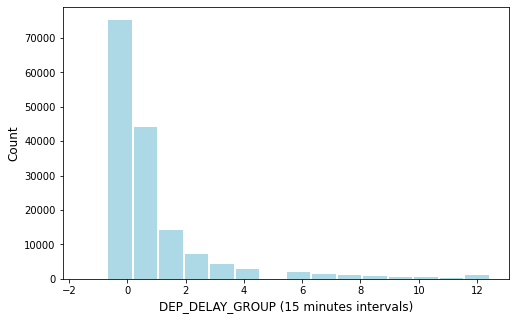

Text(0, 0.5, 'Count')

In [0]:
# DEP_DELAY_GROUP: Departure Delay intervals, every (15 minutes from <-15 to >180)
delay_groups = len(df_airlines.select("DEP_DELAY_GROUP").distinct().collect())
bar_graph = df_airlines.select("DEP_DELAY_GROUP").rdd.flatMap(lambda x: x).histogram(delay_groups)
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x=bar_graph[0][1:], height=bar_graph[1], color='lightblue')
ax.set_xlabel('DEP_DELAY_GROUP (15 minutes intervals)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

NOTES: The Departure Delay Group distribution is skewed to the right, the majority of flights are delayed less than 15 minutes

##### Check if there is any relationship between delay and flight distance

In [0]:
distance_and_delay = df_airlines.select("DISTANCE_GROUP", "DEP_DELAY") \
                                .groupby("DISTANCE_GROUP") \
                                .agg(mean("DEP_DELAY"), count("DEP_DELAY")) \
                                .sort("DISTANCE_GROUP") \
                                .collect()
display(distance_and_delay)

DISTANCE_GROUP avg(DEP_DELAY) count(DEP_DELAY) 1 11.700060422960725 24825 2 11.585434974780302 38462 3 11.900380519036018 49669 4 14.716210247349823 18112 5 16.64554084770691 7479 6 17.897707231040563 2835 7 12.98276258331418 8702 8 15.37124634600053 3763 9 9.600189035916824 2116 11 22.190298507462686 268

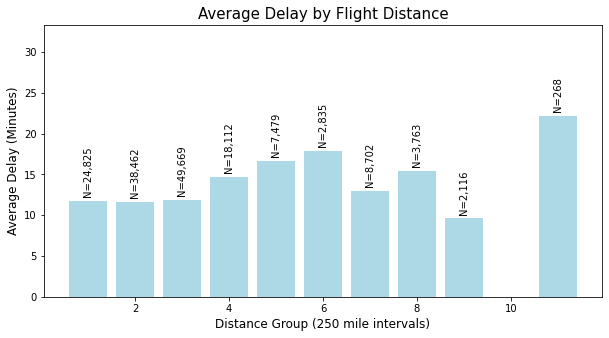

In [0]:
distance_df = pd.DataFrame(distance_and_delay, columns=["DISTANCE_GROUP", "AVG_DEP_DELAY", "COUNT_DELAY"])
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(distance_df["DISTANCE_GROUP"], height=distance_df["AVG_DEP_DELAY"], color='lightblue')
ax.set_xlabel("Distance Group (250 mile intervals)", fontsize=12)
ax.set_ylabel("Average Delay (Minutes)", fontsize=12)
ax.set_title("Average Delay by Flight Distance", fontsize=15)
for i, row in distance_df.iterrows():
    group, delay, n = row["DISTANCE_GROUP"], row["AVG_DEP_DELAY"]+0.5, f"N={row['COUNT_DELAY']:,.0f}"
    ax.text(group, delay, n, ha="center", va="bottom", rotation=90)
ax.set_ylim(0, ax.get_ylim()[1]+10)
plt.show()

NOTES: Aggregated the average departure delay (in minutes) by Distance Group with 250 miles intervals. It seems like longer distance flights are delayed with an average of 20-25 minutes. For short distance flights, the average delay time is less than 15 minutes.

#####The flight delays might be associated with airline carriers

Rank the top 10 airline carriers by the most number of delays

In [0]:
num_dep_delay = df_airlines.select( 'OP_UNIQUE_CARRIER','DEP_DEL15' ).groupBy('OP_UNIQUE_CARRIER').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'Num_Departure_Delay') 
df = num_dep_delay.toPandas()
df_sort = df.sort_values(by='Num_Departure_Delay', ascending=False)
airline_carrier = df_sort.head(10)
display(airline_carrier)

OP_UNIQUE_CARRIER Num_Departure_Delay DL 9202.0 EV 6107.0 MQ 5259.0 UA 5037.0 AA 3168.0 OO 3072.0 WN 2511.0 NK 979.0 F9 615.0 US 465.0

Out[39]:

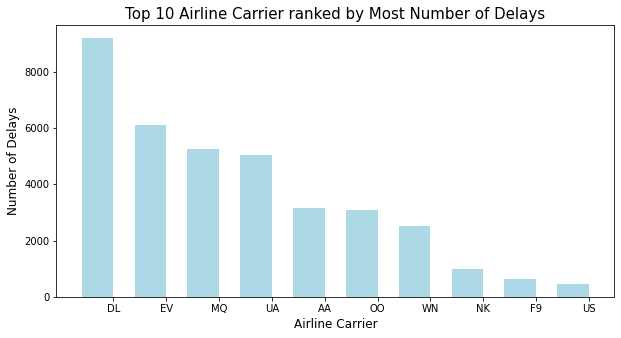

([<matplotlib.axis.XTick at 0x7fcce08edeb0>,
 <matplotlib.axis.XTick at 0x7fccf91d6850>,
 <matplotlib.axis.XTick at 0x7fcce539e160>,
 <matplotlib.axis.XTick at 0x7fcce5372ac0>,
 <matplotlib.axis.XTick at 0x7fcce56cb130>,
 <matplotlib.axis.XTick at 0x7fcce5434730>,
 <matplotlib.axis.XTick at 0x7fcce5434e50>,
 <matplotlib.axis.XTick at 0x7fcce53ed580>,
 <matplotlib.axis.XTick at 0x7fcce55e1760>,
 <matplotlib.axis.XTick at 0x7fcce54bee80>],
 [Text(0.3, 0, 'DL'),
 Text(1.3, 0, 'EV'),
 Text(2.3, 0, 'MQ'),
 Text(3.3, 0, 'UA'),
 Text(4.3, 0, 'AA'),
 Text(5.3, 0, 'OO'),
 Text(6.3, 0, 'WN'),
 Text(7.3, 0, 'NK'),
 Text(8.3, 0, 'F9'),
 Text(9.3, 0, 'US')])

In [0]:
# Draw histogram for airline carriers with the most departure delays
fig = plt.figure(figsize = (10, 5))
bar_width = 0.6

number_of_carrier = np.arange(len(airline_carrier['OP_UNIQUE_CARRIER'].unique()))


bar_graph_carrier = plt.bar(number_of_carrier, airline_carrier['Num_Departure_Delay'],
                            width = bar_width, label = 'Num_Departure_Delay', color = 'lightblue')

plt.ylabel("Number of Delays", fontsize=12)
plt.xlabel("Airline Carrier", fontsize=12)
plt.title("Top 10 Airline Carrier ranked by Most Number of Delays", fontsize=15)
plt.xticks(number_of_carrier + bar_width / 2, airline_carrier['OP_UNIQUE_CARRIER'].unique())

#####The flight delays might be impacted by seasonality and time-related factors, hours, day of the week , holiday

In [0]:
month_delay = df_airlines.select( 'MONTH','DEP_DEL15' ).groupBy('MONTH').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'Num_Departure_Delay') 
month_delay = month_delay.toPandas()
display(month_delay)

MONTH Num_Departure_Delay 1 11887.0 2 12848.0 3 11950.0

Out[47]:

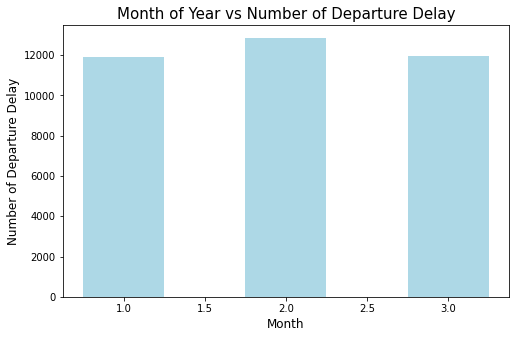

Text(0.5, 1.0, 'Month of Year vs Number of Departure Delay')

In [0]:
month_delay = df_airlines.select( 'MONTH','DEP_DEL15' ).groupBy('MONTH').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'Num_Departure_Delay') 
month_delay = month_delay.toPandas()

fig = plt.figure(figsize = (8, 5))
# x = np.arange(len(month_delay['MONTH'].unique()))
bar_width = 0.5

# plt.bar(x, month_delay['MONTH'],
#             width=bar_width, label='Num_Departure_Delay', color='lightblue')
plt.bar(month_delay['MONTH'] , month_delay['Num_Departure_Delay'],  
            width=bar_width, label='Num_Departure_Delay', color='lightblue')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Number of Departure Delay', fontsize = 12)
plt.title('Month of Year vs Number of Departure Delay', fontsize = 15)

Since the testing data we are using only contains 3 months, will create one using full year data

In [0]:
day_of_week_delay = df_airlines.select( 'DAY_OF_WEEK','DEP_DEL15' ).groupBy('DAY_OF_WEEK').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'Num_Departure_Delay') 
day_of_week_delay = day_of_week_delay.toPandas()
day_of_week_delay = day_of_week_delay.sort_values(by='DAY_OF_WEEK')
display(day_of_week_delay)

DAY_OF_WEEK Num_Departure_Delay 1 6412.0 2 5331.0 3 4603.0 4 5739.0 5 5852.0 6 3347.0 7 5401.0

Out[46]:

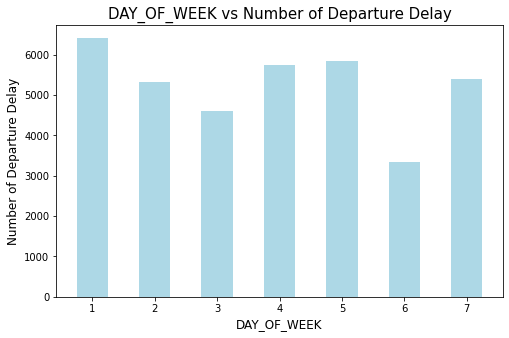

Text(0.5, 1.0, 'DAY_OF_WEEK vs Number of Departure Delay')

In [0]:
day_of_week_delay = df_airlines.select( 'DAY_OF_WEEK','DEP_DEL15' ).groupBy('DAY_OF_WEEK').agg(f.sum('DEP_DEL15')).withColumnRenamed('sum(DEP_DEL15)', 'Num_Departure_Delay') 
day_of_week_delay = day_of_week_delay.toPandas()

fig = plt.figure(figsize = (8, 5))
# x = np.arange(len(month_delay['MONTH'].unique()))
bar_width = 0.5

# plt.bar(x, month_delay['MONTH'],
#             width=bar_width, label='Num_Departure_Delay', color='lightblue')
plt.bar(day_of_week_delay['DAY_OF_WEEK'] , day_of_week_delay['Num_Departure_Delay'],  
            width=bar_width, label='Num_Departure_Delay', color='lightblue')
plt.xlabel('DAY_OF_WEEK', fontsize = 12)
plt.ylabel('Number of Departure Delay', fontsize = 12)
plt.title('DAY_OF_WEEK vs Number of Departure Delay', fontsize = 15)

Will get the 'hour' from DEP_TIME and plot a bar graph for different hours in a day

##Weather Dataset EDA

##### Number of Unique Weather Stations

In [0]:
# Number of Unique Weather Stations
print("Total Number of Unique Stations:", df_weather.select("STATION").distinct().count())

Total Number of Unique Stations: 12138

Total Number of Unique Stations: 12138

##### Check how many rows are null for each field

In [0]:
# Check how many rows are null for each field, took too long to run, just cancelled :(

column_null_counts = {}
for variable in df_weather.columns:
    column_null_counts[variable] = df_weather.select(variable).where(f.col(variable) == '').count()

In [0]:
# Calculate the non-null percentage
non_null_percentage  = (100 - 100 * pd.DataFrame([column_null_counts])/df_weather.count())

In [0]:
column_completeness = percent_coverage.T.reset_index().rename_axis(None).rename_axis(None, axis=1)
column_completeness = column_completeness.rename(columns = {'index':'Field'})
column_completeness.rename( columns={0 :'Coverage'}, inplace=True )
column_completeness[column_completeness.Coverage<50]


##Station Dataset EDA

In [0]:
display(df_stations.select("neighbor_call").distinct())

neighbor_call PAST PAPT PAWD PAIG PAFE KAXS KPDK KLCK KAAT KPHP KFSI KAVP KOLE KATL KRFD KJYR KIML KACV KSIY KLJF KUAO KLSV KRTN KGRR KMHT KIGX K40B KRCR KHUM KGGG KTRL KBWD KPTV KVIS KHYS KMSP KOLV KRNH KBRO KDAW K4CB KGBN KJYL KSBO KSLI KHBR KJCT KMJX KDED KDDC KYNG KWEY HIA PAOR KBTA KFTN KHKA KLOU KTOR KLVM KIMT KCKC KWHP K8A0 KSAA KUBE KEHA KLDM KBAF NWF PAZK KDNN KMGM KMSY KBAD KFST KPSP KFTG KAXA PHOG KHIE PAKK KLBR KSPL KAXO KFFM KLUD KBNL K65S KMQB KLRU KMYF KPBH KBTM KHAI KGMU KSGH KBDR KSCF PPIZ KNZY KHEF KARV KM40 KDLZ K4DG K1A6 KD95 KGGP K3A1 KMYP K12N KONO KFAR KHNZ KGUY KBGM KFWN KAGR PATE KW22 KMTH KGCM KCPW KSJX KBTR KJEF KP58 KAFK KMFR KGDV KPWK K19A PAPO KJKL KAWH PACV KLAL KRKS KSPF KGFK KYKM KSCH PHLI KRME KCRH KSVC PAMH PANC KHQZ KFWZ KARA KTKC KNJK KBUR KTIK KDKR KHLC KLRJ KSDY KDUA KFPR KBLM KMMK KOXB KNGZ PAIW PAMB KAVL KHUF KFSW KAUW KW99 KPSO PAUD KEMK KVDF KCFE KSGR KBFL KMRY KOLZ KISN KFHR KVAD KEMM KGSM KFXE KGRK KEDW KOAK KBAM KBTP KHXD KHZX KAJG KIOB KUVA KCRP KNRS KITR KCNY KSLB KEPH KTSP KNGU KMPO KE38 KSJC KS32 K4I3 KCQC KDAY KBID KACK PANI KGYI KSHV KMTW KVVV KFWC KLUA KCPC KOBE KPIL KATY HUF KASW KCEY KTME KDRI KNOG KMKC KCPS KBRD KONA KEUL KDYT KDXX KEAT KBYS KMFV K4MR KCWC KCMA KFSD KAWO PHNG KPHD KERI PAWR KMWN KVYS KEFD KAFP KBNW KSOP K1P1 ATLN CGA PAGM KRSV KPVW KORS KFHU KOKB KMWT KFDR KSBA KFET KLND KINS KI16 KCGX PAGS PADK KDIJ KCKV KLUK KYIP KGRI KPPQ KTNB KTCS KFME PASY PAHO KT82 KSNS KMKT KINL KPQL KTTA KGON PAHV KNIR KILL KJSV KLZK PAWG KRCM KGKY KVBT KCNK KCMI KWRL KBZN KGYL KONT KEFK KLCI KJVW KTOI KAUS KBVX KJYO KDEH KDLL KEHO KSMS KIWD KMPZ KARG KFLD KORG KVJI KNRC PAHL KBPG KPEA KGLY KDMA KLHX KMTP KEAR KSTC KTCM KGHB KZPH KCAK KDAB PAGN KMXF KLHQ KDVN KCVH KHQU KCVN KRDG KJFZ KDNK KSSF KMQY KINW KDIK KY51 KMTN 4DG K5T6 PANW KRFI KBDN KVES KF46 KIER KLPC KFFT KGRB PAFK PHNA PAMD KMGG KSNL KHYI KGEV KFRI KCVO KAKQ KFIG K40J KNXF PAKN KALX KHEQ KBQK KOKM KTAD KJOT KENV KEMT KDRO KFMH KJWG KUNI KSPA KCBE KBMC KDLP KLYV KT65 KUXL KEVV KOVS KHST KHYR KFOK KDKK KBGS KHCA PAOO KOXI KMCJ KDAG KHNB KOEO KDUH KDRM KDYS KTOA KSEZ KEHR KIAB KMER KGIC KRDM KFWB KUKT KGRY KMWO KNHK KNFE KCLE KIIY KUCA KPYX KRAS KGOV KECU KSJN KABR KRXE KGAI K08D KCHK KATS KNFJ PAFS PABT KJSO K0CO KADF KAZE KMNZ KELP KADM KPGA KDPA KEBS KRYV KMQS KSPD KTIX KEGI KASG KAIA KRAC KMJQ KSPB KMOX PAMY KFPK KHHV KPNT KCGI KMTO KARB KGLR KLXN KGEG KNID KNLC KHRT KBWI KBLF KINJ KACJ KDQH KEVB KPOC KOMK KMFD KAPA KPVD KBPI KP38 KFYG KSAF KAVC KASE KAWG KMCW KMMV KAFF KFZY KFBL PACY KERV KPAH KVGT KEST KBKL KBFD PAEH K0J4 KRQE KCDS KCYS KMRJ KPPF PHKO KFFO K48I KFYJ KDUB KEDU KSWW KMMT KHSV KFYV KEED KOFK KSNT KMCN KMYV KCNC KRST PAMM KPIR KGWW KHND KLOR KHKS KMCB KHOB KHDE KCUT KLWT KSMQ KRWI KLDJ KOPM K3I2 KCQF KECP KFZG KLCG KSXT KUNU KMML KSHN KBOW KPHF KVWU KEPM KNAO KJFX KLXV KMTJ KPHN KLWD KMYL PHJH KTYQ KARW KLWA KCSV KLSB KPFN KXNA KETB KLGD KDMW PAFA KBBG K5W8 KILE KCDJ KTOB KONP KSAR KDVL K5J0 KTDO KNXP KEDJ K96D KPBF KMDH KGLD KERY KNUQ KDNL KRCZ KFAF KDCA KIPT TJMZ KORC KBGE KJDD KLAA KMTC KHIB KGIF KFLO K42J KVKY KMWS KI39 KPSN KAFW KIKV KHRI KRDR KPVC KCAD KBKT K3MW GNG PARY KSTK KEDC KFMY KHHF KODO KALM KPAN KBMI KMCK KEFT KHTO KOAJ KBKW KIPN PAVD K27A KPWG KMMH KMVN KSCK KHTL KFGN KDEW KRZL KIPL KUCY KDYR KEWB KWWD KN91 PASC PAMC PATQ KGWB KRAL KSPI KSQL KIBM KGHW KAXN KMLB KILM KORH KDFB K93S KDZB KBMT KHTS KGNA KNCA KLNP KCKB PAAP PAMK PAAK KJWY KRCE KPPO KCSM KOKC KTOC KDEN KSUW KVUO KVAY KCRW KDSV KLEB PAUO KVTI KSHD KSTS KBRL KMBG TIST KFLY KCHD KAQV KCLT KUNO KGCN KPRB KADG KBDG KTTN KCBG PAPB KDVK KCUL KCCO KAMG K4O4 KSHL KWWR KTZR KWLD KSWF PAPM KMDQ KMIA KTVR KCOQ KPAE KARR K11R KPTB KIAG KEYW KBQP KELD KVTN KOSC KBOI KPLN KCNM KHWV KPBA PAWN PAGA PALP KI75 KBAC KGDB KSBS KMUO KMEH KBWG KPOU KMVY KBFW KACP KPEZ KDNV KNPA KGTU KGYR KVNY KRDU KLNL KFDY KPTT KLRD KADC KNTU KP53 KPRO KTYR KCAE KGSH KONZ KMCD KI35 KDUX KIAD KFCS KBML KBJN KSLH KRSW KIKK KPMD KPVU KNRB KSIF KBUO KCLK KT35 KVPC KS

### Filter on distance_to_neighbor = 0 to get station = neighbor

In [0]:
# Filter on distance_to_neighbor = 0 to get station = neighbor

filtered_df_stations = df_stations.filter(col("distance_to_neighbor") == 0)
display(filtered_df_stations)

usaf wban station_id lat lon neighbor_id neighbor_name neighbor_state neighbor_call neighbor_lat neighbor_lon distance_to_neighbor 690020 93218 69002093218 36.0 -121.233 69002093218 JOLON HUNTER LIGGETT MIL RES CA KHGT 36.0 -121.233 0.0 690070 93217 69007093217 36.683 -121.767 69007093217 FRITZSCHE AAF CA KOAR 36.683 -121.767 0.0 690140 93101 69014093101 33.667 -117.733 69014093101 EL TORO MCAS CA KNZJ 33.667 -117.733 0.0 700271 27506 70027127506 71.333 -156.65 70027127506 BARROW POINT BARROW AK KPBA 71.333 -156.65 0.0 700450 27512 70045027512 70.917 -153.25 70045027512 LONELY AK LNI 70.917 -153.25 0.0 700630 27403 70063027403 70.5 -149.883 70063027403 OLIKTOK POW 2 AK POLI 70.5 -149.883 0.0 700635 26465 70063526465 68.479 -149.49 70063526465 GALBRAITH LAKE AIRPORT AK PAGB 68.479 -149.49 0.0 700636 27405 70063627405 70.25 -148.333 70063627405 PRUDHOE BAY AK PAUD 70.25 -148.333 0.0 701046 26418 70104626418 65.567 -144.765 70104626418 CENTRAL AIRPORT AK PACE 65.567 -144.765 0.0 701195 26625 70119526625 66.25 -166.089 70119526625 SHISHMAREF/NEW AIRPORT AK PASH 66.25 -166.089 0.0 701213 26638 70121326638 69.733 -163.017 70121326638 POINT LAY LIZ 2 AK PIZ 69.733 -163.017 0.0 701486 26642 70148626642 67.732 -164.548 70148626642 KIVALINA AIRPORT AK PAVL 67.732 -164.548 0.0 701620 26508 70162026508 69.367 -152.133 70162026508 UMIAT AK PAUM 69.367 -152.133 0.0 701719 00490 70171900490 66.888 -157.162 70171900490 SHUNGNAK AIRPORT AK PAGH 66.888 -157.162 0.0 701745 26480 70174526480 67.511 -148.493 70174526480 CHANDALAR LAKE AIRPORT AK PALR 67.511 -148.493 0.0 701793 26524 70179326524 64.999 -150.638 70179326524 MANLEY HOT SPRINGS AK PAML 64.999 -150.638 0.0 701995 26628 70199526628 64.55 -163.007 70199526628 CAPE DARBY REMOT COM OUTLT AK PAGL 64.55 -163.007 0.0 702060 26632 70206026632 63.317 -168.967 70206026632 NORTHEAST CAPE AK KOHC 63.317 -168.967 0.0 702223 26602 70222326602 64.935 -161.155 70222326602 KOYUK AIRPORT AK PAKK 64.935 -161.155 0.0 702312 26555 70231226555 62.543 -153.623 70231226555 FAREWELL LAKE SEAPLANE BASE AK PAFK 62.543 -153.623 0.0 702495 26547 70249526547 61.983 -152.083 70249526547 HAYES RIVER AIRPORT AK PAHZ 61.983 -152.083 0.0 702550 26514 70255026514 61.977 -151.217 70255026514 SKWENTNA AIRPORT AK PASW 61.977 -151.217 0.0 702640 26414 70264026414 63.331 -149.127 70264026414 SUMMIT AK PAST 63.331 -149.127 0.0 702647 26499 70264726499 63.866 -148.969 70264726499 HEALY RIVER AIRPORT AK PAHV 63.866 -148.969 0.0 702648 46406 70264846406 63.391 -148.956 70264846406 CANTWELL AIRPORT AK PATW 63.391 -148.956 0.0 702675 26484 70267526484 63.032 -145.498 70267526484 PAXSON AIRPORT AK PAXK 63.032 -145.498 0.0 702695 96402 70269596402 61.714 -148.909 70269596402 JONESVILLE MINE AIRPORT AK PAJV 61.714 -148.909 0.0 702711 26439 70271126439 61.812 -147.507 70271126439 SHEEP MOUNTAIN AIRPORT AK PASP 61.812 -147.507 0.0 702745 26560 70274526560 61.748 -150.054 70274526560 WILLOW AIRPORT AK PAUO 61.748 -150.054 0.0 702750 26442 70275026442 61.13 -146.352 70275026442 NATIONAL WEATHER SERVICE OFFI AK PAVW 61.13 -146.352 0.0 702755 46404 70275546404 61.437 -142.904 70275546404 MCCARTHY AIRPORT AK PAMX 61.437 -142.904 0.0 702757 26444 70275726444 60.783 -148.733 70275726444 WHITTIER AIRPORT AK PAWR 60.783 -148.733 0.0 702913 46402 70291346402 62.402 -142.995 70291346402 DEVILS MOUNTAIN LODGE AIRPORT AK PABN 62.402 -142.995 0.0 702915 26486 70291526486 62.709 -143.981 70291526486 DUFFY'S TAVERN AIRPORT AK PADT 62.709 -143.981 0.0 702923 26440 70292326440 63.383 -143.333 70292326440 TANACROSS AK TSG 63.383 -143.333 0.0 702986 26557 70298626557 60.814 -152.297 70298626557 BIG RIVER LAKE AK PALV 60.814 -152.297 0.0 703051 26521 70305126521 62.183 -159.767 70305126521 HOLY CROSS AIRPORT AK PAHC 62.183 -159.767 0.0 703406 26546 70340626546 60.204 -154.316 70340626546 PORT ALSWORTH AIRPORT AK PALJ 60.204 -154.316 0.0 703650 25316 70365025316 58.2 -136.633 70365025316 CAPE SPENCER AK KCSP 58.2 -136.633 0.0 703817 25357 70381725357 58.192 

In [0]:
print("Total Number of Unique Stations:", filtered_df_stations.select("station_id").distinct().count())

Total Number of Unique Stations: 2237